## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
import librosa
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
import torchaudio


### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [2]:
### YOUR CODE HERE
## A sample of transcriptions of patient audio recordings 
df_recordings = pd.read_csv("sample_transcriptions.csv")

Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

In [3]:
### Audio samples from the data
display.Audio("sample_audio_recordings/1249120_44142156_69073946.wav", autoplay=True)

In [4]:
display.Audio("sample_audio_recordings/1249120_44142156_72116310.wav", autoplay=True)

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [5]:
## Function to generate spectrograms of the audio files
def spectrogramGenerator(audio_path):
    x, sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize = (10, 5))
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()    

AudioMetaData(sample_rate=48000, num_frames=147456, num_channels=2, bits_per_sample=16, encoding=PCM_S)


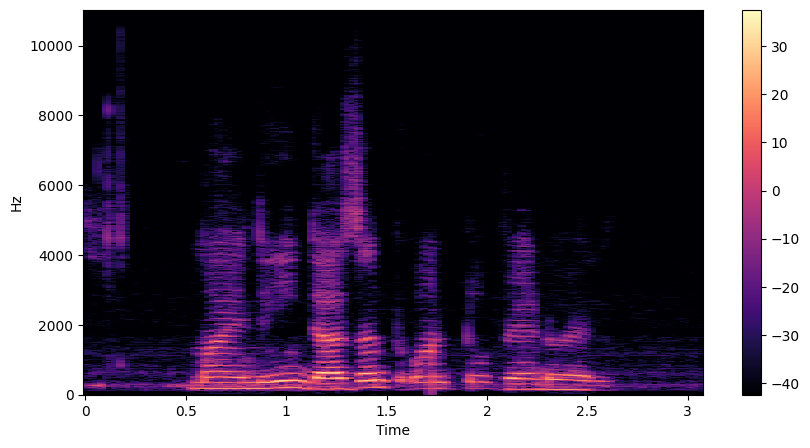

In [9]:
## Spectrograms and metadata of the audio files loaded in the previous section
spectrogramGenerator("sample_audio_recordings/1249120_44142156_69073946.wav")
metadata_1 = torchaudio.info("sample_audio_recordings/1249120_44142156_69073946.wav")
print(metadata_1)

AudioMetaData(sample_rate=48000, num_frames=212992, num_channels=2, bits_per_sample=16, encoding=PCM_S)


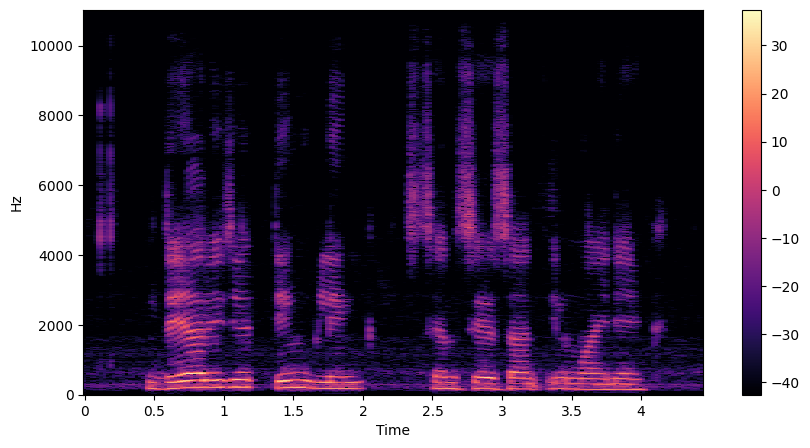

In [10]:
spectrogramGenerator("sample_audio_recordings/1249120_44142156_72116310.wav")
metadata_2 = torchaudio.info("sample_audio_recordings/1249120_44142156_72116310.wav")
print(metadata_2)

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

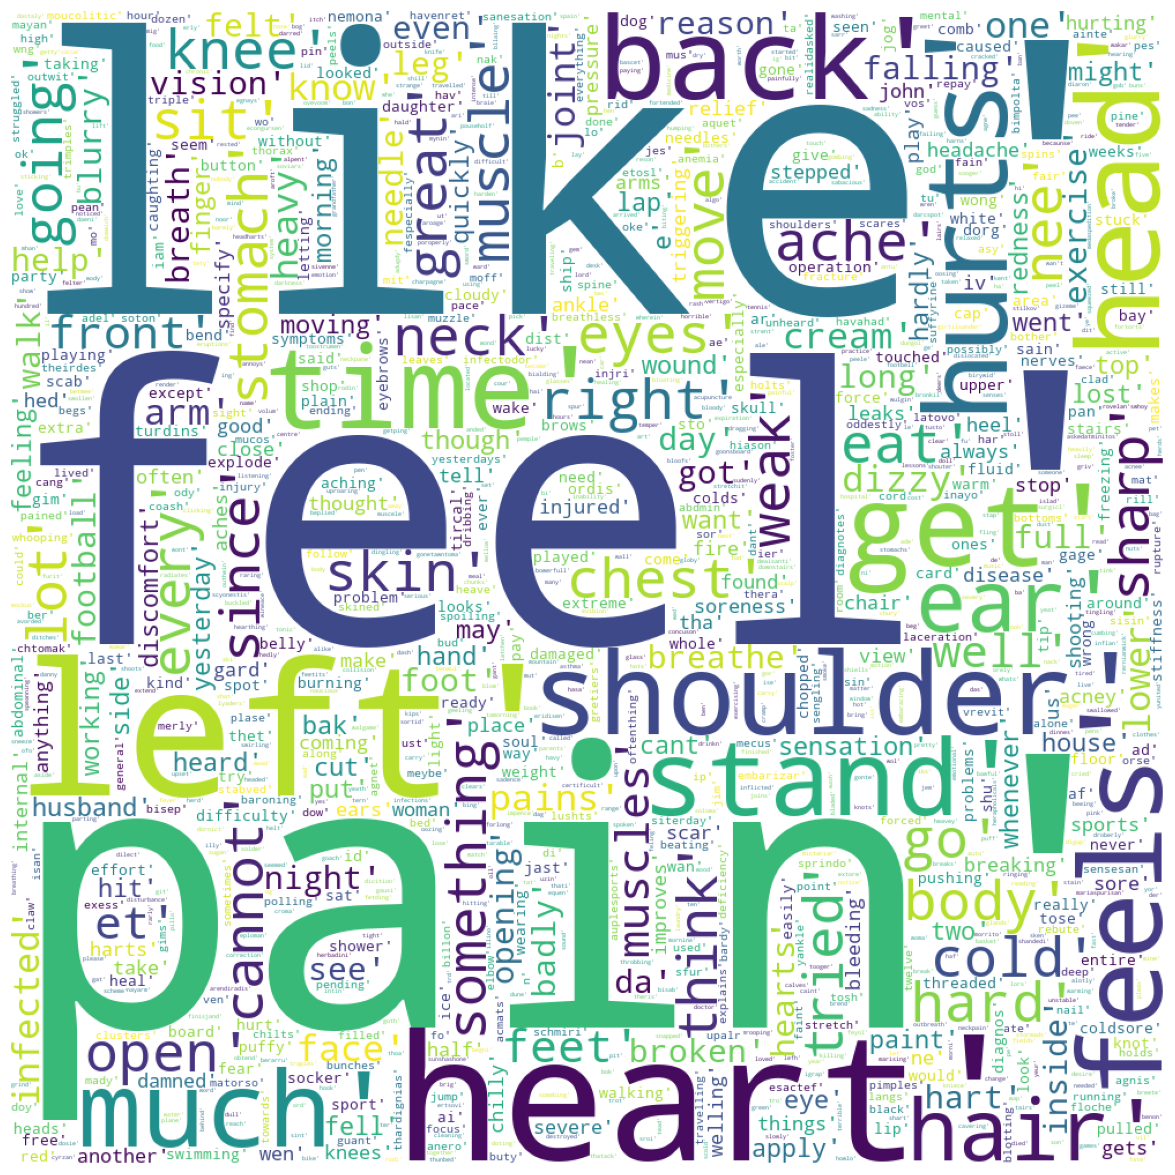

In [11]:
### YOUR CODE HERE
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

plt.figure(figsize=(15,15))
wordCloudFunction(df_recordings,'transcriptions',10000000)

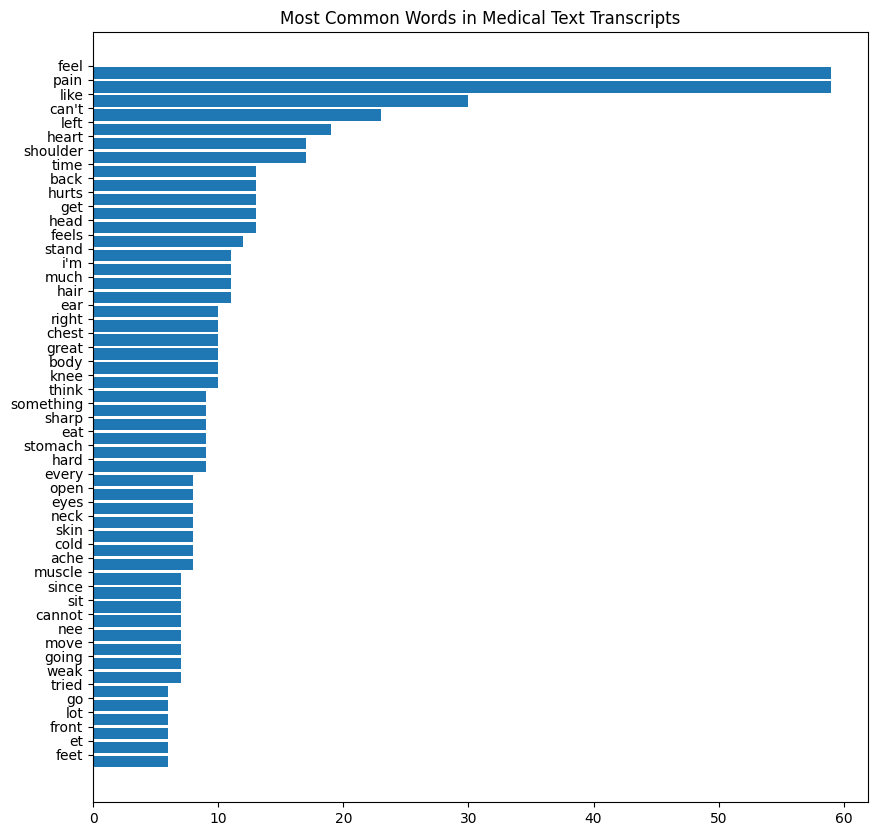

In [12]:
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

plt.figure(figsize=(10,10))
wordBarGraphFunction(df_recordings,'transcriptions',"Most Common Words in Medical Text Transcripts")    

### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

`### Comment here`